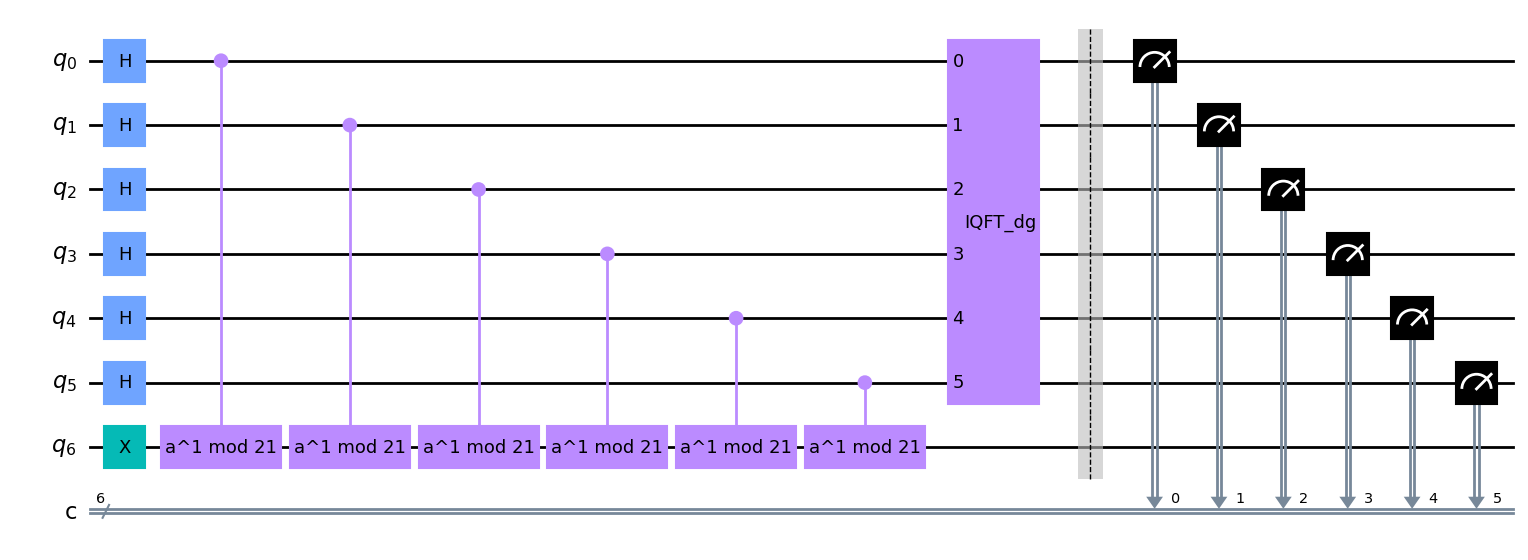

In [1]:
%matplotlib inline
# Import necessary libraries
from qiskit import QuantumCircuit, Aer, execute
import numpy as np
from qiskit.circuit.library import *
from fractions import Fraction
from qiskit.visualization import plot_histogram
from math import gcd # greatest common divisor

def U_a(k):
    U = QuantumCircuit(1)
    for i in range(2**k):
        angle = np.pi/2**(i+1)
        U.p(angle, 0);
    U = U.to_gate(label="a^%d mod %d" %(repetitions, N)).control()
    return U

# Define the number to be factored
N = 21
a=2

# Define the quantum circuit with 7 qubits and 2 classical registers
qc = QuantumCircuit(7, 6)

# Apply Hadamard gates to the first 6 qubits
qc.h(range(6))
qc.x(6)

# Apply a phase estimation circuit to estimate the eigenvalues of the unitary operator Ua = a^x mod N
# where a = 2
repetitions = 1
for counting_qubit in range(6):
    qc.append(U_a(counting_qubit), [counting_qubit, 6])

# Do the inverse QFT:
qc = qc.compose(QFT(6, inverse=True), range(6))
qc.barrier()

# Measure the first 6 qubits and store the measurement result in the classical register cr1
qc.measure(range(6), range(6))
qc.draw(output="mpl")

In [3]:
attempt = 0
factor_found = False
while not factor_found:
    attempt += 1
    print("\nAttempt %i:" % attempt)
    # Run the circuit on a simulator
    backend = Aer.get_backend('qasm_simulator')
    counts = execute(qc, backend, shots=1024).result().get_counts()
    plot_histogram(counts)

    # Analyze the measurement results to obtain the eigenvalue
    reading = max(counts, key = lambda x: counts[x])
    print("Measured cr1 = ", reading)
    phase = int(reading, 2) / 2**6
    frac = Fraction(phase).limit_denominator(N) 
    r = frac.denominator

    if phase != 0:
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print("Guessed Factors: %i and %i" % (guesses[0], guesses[1]))
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0: # Check to see if guess is a factor
                print("*** Non-trivial factor found: %i ***" % guess)
                factor_found = True
                


Attempt 1:
Measured cr1 =  001011
Guessed Factors: 3 and 1
*** Non-trivial factor found: 3 ***


In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Options, Sampler
from qiskit import QuantumCircuit
from qiskit.providers.ibmq import IBMQ

provider = IBMQ.load_account()
backend = provider.get_backend("ibmq_jakarta")

service = QiskitRuntimeService()
options = Options(optimization_level=1)
options.execution.shots = 1024  # Options can be set using auto-complete.

with Session(service=service, backend="ibmq_jakarta") as session:
    
    attempt = 0
    factor_found = False
    while not factor_found:
        attempt += 1
        print("\nAttempt %i:" % attempt)

        counts = execute(qc, backend, shots=1024).result().get_counts()
        plot_histogram(counts)

        # Analyze the measurement results to obtain the eigenvalue
        reading = max(counts, key = lambda x: counts[x])
        print("Measured cr1 = ", reading)
        phase = int(reading, 2) / 2**6
        frac = Fraction(phase).limit_denominator(N) 
        r = frac.denominator

        if phase != 0:
            guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
            print("Guessed Factors: %i and %i" % (guesses[0], guesses[1]))
            for guess in guesses:
                if guess not in [1,N] and (N % guess) == 0: # Check to see if guess is a factor
                    print("*** Non-trivial factor found: %i ***" % guess)
                    factor_found = True

session.close()


Attempt 1:
Measured cr1 =  011110
Guessed Factors: 3 and 1
*** Non-trivial factor found: 3 ***
